# Standardize Filters

* We are using lots of different filter traces, especially when we combine the UAT Groups project and Virgo.
* We have filter traces from lots of different sources.
* I want to write them out in a uniform way, with wavelength and transmission in the same units for all.
* I also want to write them in fits format so we can easily store the units and column names.

## References
* https://noirlab.edu/science/programs/kpno/filters/mosaic?page=1

## All Filters

Base directory is `/Users/rfinn/research/Halpha_filters/`

| Telescope | Instrument | Filter | Source File |Nheader | Wave_A | Transcale | Notes |
|---|---|---|---|---|
| WIYN 0.9 m | MOS| HarrisR | kpno/k1004bp_aug04.txt | 15| 1 |1 |from noao filter webpage |
| WIYN 0.9 m | MOS| SDSSr | kpno/k1018.txt|  15 |1 |1 | |
| WIYN 0.9 m | MOS | Ha+4nm |kpno/k1010.txt | 15|1 |1 | the sim04 files for f/7.9 are similar to straight through. using trace for straight through rays.|
| WIYN 0.9 m | MOS |Ha+8nm |kpno/k1011.txt | 15|1 |1 | weird discrepancy between curve for straight through vs sim04.  Seems like sim04 might use trace from 1997 rather than March 2002 https://noirlab.edu/science/images/kp1011 |
| WIYN 0.9 m | MOS | Ha+12nm |kpno/k1012.txt | 15|1 |1 | |
| WIYN 0.9 m | MOS | Ha+16nm |kpno/k1013.txt | 15|1 |1 |  |
| WIYN 0.9 m | HDI| HarrisR |hdi/Harrisr.txt | 15|1 |1 |  this is the trace for the s2kb instrument|
| WIYN 0.9 m | HDI| SDSSr | hdi/sdss_r_digitized.csv| 1|10 |1 |  we digitized this from a pdf of the filter curve.  |
| WIYN 0.9 m | HDI | Ha | hdi/6570_pix.txt| 0|1 |1 | s2kb filters|
| WIYN 0.9 m | HDI | Ha+4nm | hdi/6620_pix.txt | 0 |1 |1 |s2kb filters|
| WIYN 0.9 m | HDI |Ha+8nm |hdi/6660_pix.txt| 0 |1 |1 |  s2kb filters|
| WIYN 0.9 m | HDI | Ha+12nm | hdi/6700_pix.txt| 0| 1 |1 | s2kb filters|
| WIYN 0.9 m | HDI | Ha+16nm |hdi/6740_pix.txt| 0 |1 |1 | s2kb filters, no file w/header on website |
| Bok 2.3 m | 90prime| BASSr | halphagui/BASS-r.txt| 1 |1 |1 |  BASS r-band filter|
| Bok 2.3 m | 90prime |Ha+4nm |kpno/k1010.txt | 15 | 1 |1 | Borrowed from NOAO, this is the mosaic Ha+4nm|
| INT 2.5 m | WFC |SDSSr-214 | halphagui/wfc-int-sloan-r.txt | 11|10 |1 | https://astro.ing.iac.es/filter/list.php?instrument=WFC| 
| INT 2.5 m | WFC |Ha-197 | halphagui/wfc-int-197-halpha.txt | 10|10 |1 | https://astro.ing.iac.es/filter/list.php?instrument=WFC| 
| INT 2.5 m | WFC |Ha-227 |halphagui/wfc-int-227-ha6657.txt | 10 |10 |1 | https://astro.ing.iac.es/filter/list.php?instrument=WFC| 


Used cat to copy this table into a file so I could read it in an create output filenames. 

In [89]:
import os
from matplotlib import pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.io import ascii
import glob
homedir = os.getenv("HOME")

# NOTES

* made a directory in ~/research/Halpha_filters
* put all the traces there
* will read each in and write out a fits version

## KPNO Halpha Filters

* website says that filters are shifted 5 nm when used at WIYN 0.9 m telescope
* I downloaded the *sim04.txt files, and these have the simulated traces for different f/ratio telescopes.
* I copied the transmission data for the f/7.9, which is what the WIYM 0.9m telescope is, and pasted into new files called, e.g. `k1010simf7p9.txt` 

In [9]:
kpnodir = os.path.join(homedir,'research/Halpha_filters/kpno/')

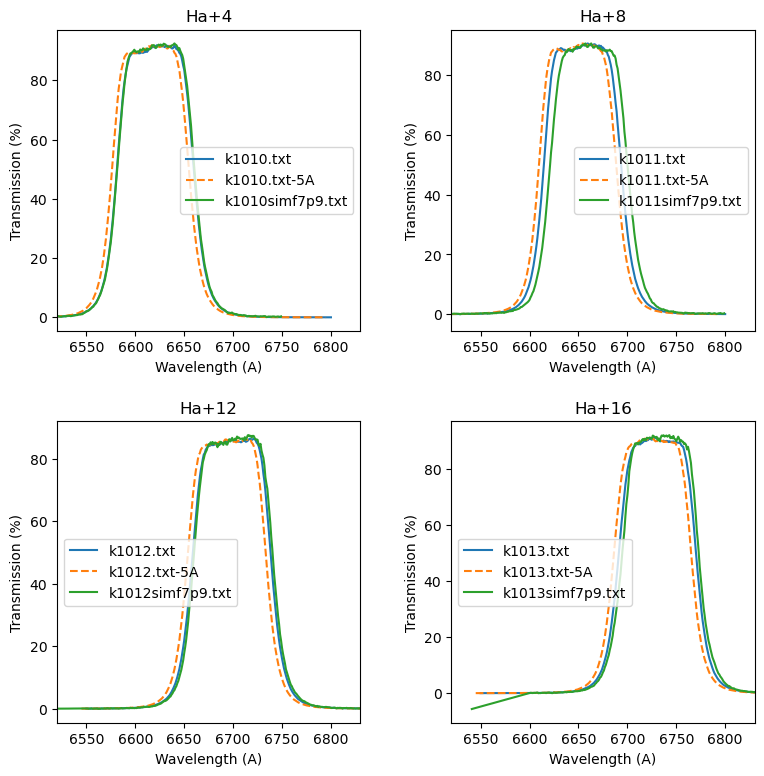

In [88]:

def plot_files(kfiles):
    cnames=['wave','trans']
    for i,f in enumerate(kfiles):
        tab = Table.read(f, data_start=13, format='ascii', delimiter=' ', fast_reader=False,names=cnames)
        #tab = Table.read(f, data_start=15, format='ascii', delimiter=r'\s')
   
        plt.plot(tab['wave'],tab['trans'],label=os.path.basename(f))
        if f.find('7p9') < 0:
            plt.plot(tab['wave']-5,tab['trans'],ls='--',label=os.path.basename(f)+"-5A")

#print(kpnodir+'*.txt')
#print(kfiles)
from astropy.io import ascii



k1files = glob.glob(kpnodir+'*f7p9.txt')
k1files.sort()
k2files = glob.glob(kpnodir+'k101?.txt')
k2files.sort()
kfiles = k1files + k2files
kfiles.sort()

all_filters = [f"k101{i}" for i in range(4)]
all_titles = [f"Ha+{n}" for n in [4,8,12,16]]
plt.figure(figsize=(9,9))
plt.subplots_adjust(hspace=.3,wspace=0.3)
for i,filt in enumerate(all_filters):
    plt.subplot(2,2,i+1)
    flist = [f"{filt}.txt", f"{filt}simf7p9.txt"]
    flist = [os.path.join(kpnodir,f) for f in flist]
    plot_files(flist)
    #break
    plt.legend()
    plt.xlim(6520, 6830)
    plt.title(all_titles[i])
    plt.xlabel("Wavelength (A)", fontsize=10)
    plt.ylabel("Transmission (%)", fontsize=10)

In [56]:
t2 = Table.read('/Users/rfinn/research/Halpha_filters/kpno/k1010simf7p9.txt',format='ascii')

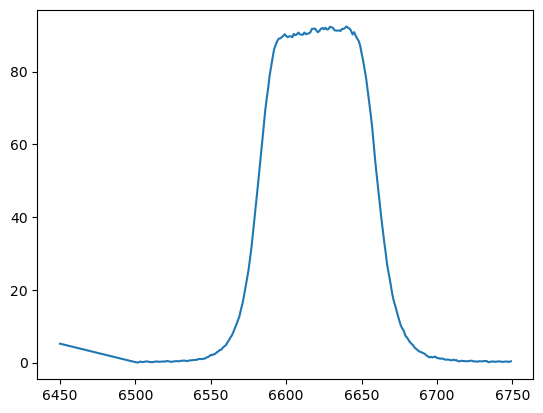

In [58]:
plt.plot(t2['col1'],t2['col2'])

In [4]:
target_dir = os.path.join(homedir,'research/Halpha_filters/halphagui')
os.chdir(target_dir)

flist = glob.glob('*.*')
print(flist)

for f in flist:
    pass
    # read in file

    # convert as necessary

    # write out results

['ha4-sim04.txt', 'kpno-harris-R-k1004.txt', 'ha16-sim04.txt', 'wfc-int-197-halpha.txt', 'ha8-sim04.txt', 'chroma-halpha-transmission-ascii.txt', 'wfc-int-227-ha6657.txt', 'ha12-sim04.txt', 'wfc-int-sloan-r.txt', 'kpno-sdss-r-k1018.txt', 'BASS-g.txt', 'BASS-r.txt']


In [6]:
# get filters already in halphagui/filter_traces

# write out filters in A, T(%) and save in filter_traces

# move the original files to filter_traces/orig_format



['HDI_R_Harrisr_nohead.txt', 'HDI_ha12_W9_6700f_nohead.txt', 'HDI_ha8_W9_6660f_nohead.txt']
HDI_R_Harrisr_nohead.txt
HDI_ha12_W9_6700f_nohead.txt
HDI_ha8_W9_6660f_nohead.txt


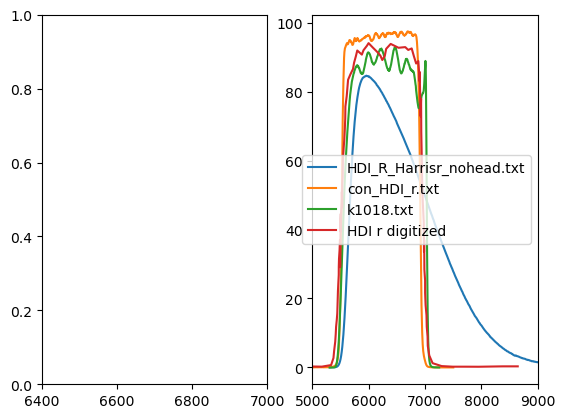

In [43]:
# get filters from Becky - save these in github too - maybe make a subdirectory filter_traces/orig_format
os.chdir('/Users/rfinn/research/Virgo/filters/')
filter_list = glob.glob('*nohead.txt')
filter_list.sort()
print(filter_list)
# read in each filter
plt.figure()
for f in filter_list:
    print(f)
    if f.startswith('HDI_6700'):
        continue
    try:
        dat = np.loadtxt(f)
    except ValueError:
        dat = np.loadtxt(f, skiprows=15)
    if f.find('ha') > -1:
        plt.subplot(1,2,1)
        continue
    else:
        plt.subplot(1,2,2)
    plt.plot(dat[:,0],dat[:,1],label=f)
files = ['con_HDI_r.txt', 'k1018.txt']
for f in files:
    try:
        dat = np.loadtxt(f)
    except ValueError:
        dat = np.loadtxt(f, skiprows=15)
    plt.subplot(1,2,2)
    if np.max(dat[:,1]) < 10:
        trans = dat[:,1]*100
    else:
        trans = dat[:,1]
    plt.plot(dat[:,0],trans,label=f)
hdi_r = os.getenv("HOME")+"/research/Halpha-filters/hdi_digitized/HDI_r.csv"
dat = ascii.read(hdi_r, format='csv', data_start=1)
wav = dat['x']*10
T = dat['y']
isort = np.argsort(wav)
plt.plot(wav[isort], T[isort], label='HDI r digitized')
plt.legend()
plt.subplot(1,2,1)
plt.xlim(6400,7000)
plt.subplot(1,2,2)
plt.xlim(5000,9000)
plt.legend()
plt.subplot(1,2,2)
plt.legend()
plt.show()
# write out filters in A, T(%) and save in filter_traces

In [1]:
# get filters from Becky - save these in github too - maybe make a subdirectory filter_traces/orig_format
os.chdir('/Users/rfinn/research/Virgo/filters/')
filter_list = glob.glob('*nohead.txt')
filter_list.sort()
print(filter_list)
# read in each filter
plt.figure(figsize=(8,4))
for f in filter_list:
    print(f)
    if f.startswith('HDI_6700'):
        continue
    try:
        dat = np.loadtxt(f)
    except ValueError:
        dat = np.loadtxt(f, skiprows=15)
    if f.find('ha') > -1:
        plt.subplot(1,2,1)
        #continue
    else:
        plt.subplot(1,2,2)
    plt.plot(dat[:,0],dat[:,1],label=f)
files = ['con_HDI_r.txt', 'k1018.txt']
for f in files:
    try:
        dat = np.loadtxt(f)
    except ValueError:
        dat = np.loadtxt(f, skiprows=15)
    plt.subplot(1,2,2)
    if np.max(dat[:,1]) < 10:
        trans = dat[:,1]*100
    else:
        trans = dat[:,1]
    plt.plot(dat[:,0],trans,label=f)
hdi_r = os.getenv("HOME")+"/research/Halpha_filters/hdi_digitized/HDI_r.csv"
dat = ascii.read(hdi_r, format='csv', data_start=1)
wav = dat['x']*10
T = dat['y']
isort = np.argsort(wav)
plt.plot(wav[isort], T[isort], label='HDI r digitized')
plt.legend()
plt.subplot(1,2,1)
plt.xlim(6400,7000)
plt.subplot(1,2,2)
plt.xlim(5000,9000)
plt.legend()
plt.subplot(1,2,1)
plt.legend()
plt.xlabel("Wavelength (A)",fontsize=14)
plt.ylabel("Transmission",fontsize=14)
plt.show()
# write out filters in A, T(%) and save in filter_traces

NameError: name 'os' is not defined

# Trying to read in all filters based on table above

basedir =  /Users/rfinn/research/Halpha_filters


In [103]:
tab

col0,Telescope,Instrument,Filter,Source File,Nheader,Wave_A,Transcale,Notes,_1
int64,str10,str7,str9,str32,int64,int64,int64,str171,int64
--,WIYN 0.9 m,MOS,HarrisR,kpno/k1004bp_aug04.txt,15,1,1,from noao filter webpage,--
--,WIYN 0.9 m,MOS,SDSSr,kpno/k1018.txt,15,1,1,--,--
--,WIYN 0.9 m,MOS,Ha+4nm,kpno/k1010.txt,15,1,1,the sim04 files for f/7.9 are similar to straight through. using trace for straight through rays.,--
--,WIYN 0.9 m,MOS,Ha+8nm,kpno/k1011.txt,15,1,1,weird discrepancy between curve for straight through vs sim04. Seems like sim04 might use trace from 1997 rather than March 2002 https://noirlab.edu/science/images/kp1011,--
--,WIYN 0.9 m,MOS,Ha+12nm,kpno/k1012.txt,15,1,1,--,--
--,WIYN 0.9 m,MOS,Ha+16nm,kpno/k1013.txt,15,1,1,--,--
--,WIYN 0.9 m,HDI,HarrisR,hdi/Harrisr.txt,15,1,1,this is the trace for the s2kb instrument,--
--,WIYN 0.9 m,HDI,SDSSr,hdi/sdss_r_digitized.csv,1,1,1,we digitized this from a pdf of the filter curve.,--
--,WIYN 0.9 m,HDI,Ha,hdi/6570_pix.txt,0,1,1,s2kb filters,--


these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0
these should be zero:  0.0 0.0


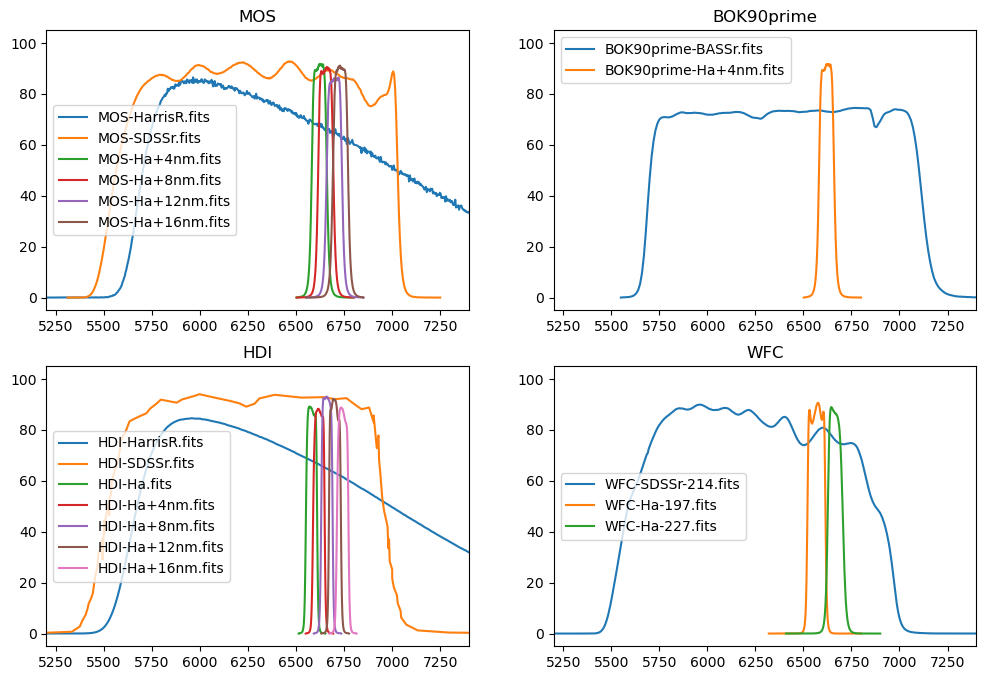

In [163]:
from astropy import units as u

def write_fits_output(tab, fname):
    # create a table, 

    # create column names

    # add units

    # write out

    pass
    
def read_file(ffile,nheader=0,wavescale=1,transcale=1,delimiter=' '):
    cnames=['wavelength','transmission']
    tab = Table.read(ffile, data_start=nheader, format='ascii', delimiter=delimiter, fast_reader=False,names=cnames, encoding='utf-8-sig')

    # digitized hdi sdss r file has some wavelengths out of order
    sorted_indices = np.argsort(tab['wavelength'])
    tab = tab[sorted_indices]

    # correct for differences in wavelength and transmission units
    tab['wavelength'] = np.array(tab['wavelength'],'d')*float(wavescale) * u.AA
    tab['transmission'] = np.array(tab['transmission'],'d')*float(transcale)

    # cleaning HarrisR filter to only keep wavelengths < 10k A
    
    cutflag = tab['wavelength'] < 10000
    tab = tab[cutflag]
    # make sure transmission values are zero at the beginning and end
    # this is necessary for speclite
    tab['transmission'][0] = 0
    tab['transmission'][-1]= 0

    # response values must be non negative
    negative_flag = tab['transmission'] < 0
    tab['transmission'][negative_flag] = 0
    
    return tab


######## MAIN  #################
basedir = os.path.join(homedir,'research/Halpha_filters')
#print("basedir = ", basedir)

outdir = os.path.join(basedir,'fits_versions')
#data_start=13, format='ascii', delimiter=' ', fast_reader=False,names=cnames
tab = Table.read(os.path.join(basedir,'overview_table.txt'), format='csv', delimiter='|',fast_reader=False,data_start=1)#,header_start=0)

subplot_dict = {'MOS':1,'BOK90prime':2,'HDI':3,'WFC':4}
plt.figure(figsize=(12,8))
for i in range(len(tab)):
    infile = os.path.join(basedir,tab['Source File'][i])
    #print(infile)
    if '.csv' in infile:
        delimiter = ','
    else:
        delimiter = ' '
    t = read_file(infile, nheader=tab['Nheader'][i], wavescale=tab['Wave_A'][i], transcale=tab['Transcale'][i],delimiter=delimiter)
    plt.subplot(2,2,subplot_dict[tab['Instrument'][i]])

    # check that response is zero
    print("these should be zero: ",t['transmission'][0], t['transmission'][-1])

    # check that no response values are negative
    if np.any(t['transmission'] < 0):
        print("\tWAIT")
        flag = t['transmission'] < 0
        print(t['wavelength'][flag])    
    # create output filename
    outfile = os.path.join(outdir,f"{tab['Instrument'][i]}-{tab['Filter'][i]}.fits")


        
    plt.plot(t['wavelength'],t['transmission'],label=os.path.basename(outfile))

    t.write(outfile,format='fits',overwrite=True)
#plt.legend()


for d in subplot_dict.keys():
    plt.subplot(2,2,subplot_dict[d])
    plt.title(d)
    plt.xlim(5200, 7400)
    plt.ylim(-5,105)
    plt.legend()

In [125]:
subplot_dict.keys()

dict_keys(['MOS', '90prime', 'HDI', 'WFC'])

# convert panstarrs filters to fits

In [160]:
cnames=['wavelength','transmission']

filters = ['g','r']
for f in filters:
    gfile = os.path.join(homedir,'research/Halpha_filters/panstarrs',f"PAN-STARRS_PS1.{f}.dat")
    gdat = Table.read(gfile, data_start=0, format='ascii', delimiter=' ', fast_reader=False,names=cnames)
    gdat['wavelength'] = gdat['wavelength'] * u.AA
    gdat['transmission'] = gdat['transmission'] * 100
    gdat['transmission'][0] = 0
    gdat['transmission'][-1] = 0
    outfile = os.path.join(outdir,f"panstarrs-{f}.fits")
    gdat.write(outfile, format='fits', overwrite=True)

In [157]:
gdat

wavelength,transmission
Angstrom,
float64,float64
3920.0,0.001
3930.0,0.002
3940.0,0.004
3950.0,0.007
3960.0,0.012
3970.0,0.021
3980.0,0.035
3990.0,0.053
